# Script de préparation du tableua de données pour la veille interne de classification des articles en Environnement/Non Environnement au sens de l'OME

In [81]:
# Import des librairies
import pandas as pd 
import seaborn as sns
import os
import shutil

In [49]:
# Import du tableau de données
df = pd.read_excel("./data/Dataset_label_env_nonenv.xlsx", engine="openpyxl")
df.shape

(447, 24)

In [50]:
df.columns

Index(['source_name', 'title', 'publication_date', 'subject_codes',
       'word_count', 'section', 'an', 'body', 'snippet', 'Dossier',
       'nom_fichier', 'text', 'LABEL - ENV/NON ENV', 'LABEL CRISE',
       'maillons_par_crise', 'raw_json', 'confiance', 'LABEL - Climat_true',
       'LABEL - Biodiversité_true', 'LABEL - Ressources_true',
       'PRED - climate_related', 'PRED - confidence', 'PRED - top_words',
       'climate_related_true'],
      dtype='object')

In [51]:
df.rename(columns={'LABEL - ENV/NON ENV':"ENV"}, inplace=True)
df.columns

Index(['source_name', 'title', 'publication_date', 'subject_codes',
       'word_count', 'section', 'an', 'body', 'snippet', 'Dossier',
       'nom_fichier', 'text', 'ENV', 'LABEL CRISE', 'maillons_par_crise',
       'raw_json', 'confiance', 'LABEL - Climat_true',
       'LABEL - Biodiversité_true', 'LABEL - Ressources_true',
       'PRED - climate_related', 'PRED - confidence', 'PRED - top_words',
       'climate_related_true'],
      dtype='object')

In [52]:
# Comptage du nombre d'article environnment/non environnement
df["ENV"].value_counts()

ENV
ENV        282
NON ENV    165
Name: count, dtype: int64

In [53]:
# Comptage du nombre d'article par source
df["Dossier"].value_counts()

Dossier
articles_pdf_national    356
articles_pdf_regional     91
Name: count, dtype: int64

<Axes: xlabel='ENV', ylabel='count'>

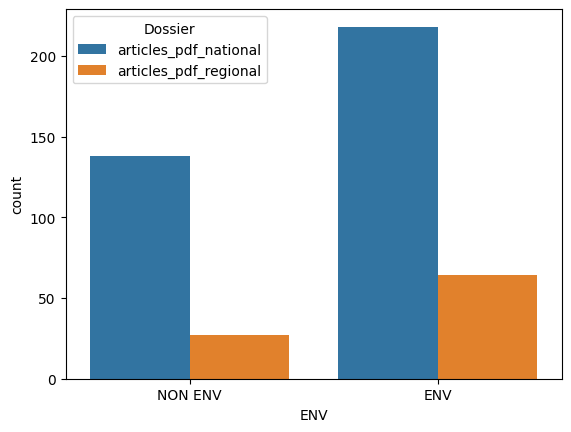

In [54]:
# Répartition des sources National/régional
sns.countplot(df, x="ENV", hue="Dossier")

In [55]:
# Comptage précis
repartition = df.groupby("ENV")["Dossier"].value_counts().reset_index()
repartition["proportions"] = repartition["count"]/df.shape[0]
repartition

,ENV,Dossier,count,proportions
0,ENV,articles_pdf_national,218,0.487696
1,ENV,articles_pdf_regional,64,0.143177
2,NON ENV,articles_pdf_national,138,0.308725
3,NON ENV,articles_pdf_regional,27,0.060403


In [58]:
repartition["Dossier"].unique()

array(['articles_pdf_national', 'articles_pdf_regional'], dtype=object)

## Echantillonnage des articles

In [76]:
# Sampling dans les catégories
df_final = pd.DataFrame()
for label in repartition["ENV"].unique():
    for dossier in repartition["Dossier"].unique():
        select_query = f'ENV == "{label}" & Dossier == "{dossier}"'
        subset = df.query(select_query)
        print("taille du sous-échantillon:", subset.shape)
        n_sample = int(round(repartition.query(select_query)["proportions"]*100,0).values[0])
        df_final = pd.concat(
            [df_final,
            subset.sample(n=n_sample, random_state=42)])
        
df_final

taille du sous-échantillon: (218, 24)
taille du sous-échantillon: (64, 24)
taille du sous-échantillon: (138, 24)
taille du sous-échantillon: (27, 24)


,source_name,title,publication_date,subject_codes,word_count,section,an,body,snippet,Dossier,...,maillons_par_crise,raw_json,confiance,LABEL - Climat_true,LABEL - Biodiversité_true,LABEL - Ressources_true,PRED - climate_related,PRED - confidence,PRED - top_words,climate_related_true
198,LePoint.fr,"EXCLUSIF. « Glamping », « asexuel », « cécifoo...",45769.00000,",gsocc,gspo,ncat,nfact,nfce,nrgn,",2104,Société,POINFR0020250422el4m002e5,"Pour entrer dans le dictionnaire, chacun de ce...",150 mots font leur entrée dans le fameux dicti...,articles_pdf_national,...,"biodiversite_constat, biodiversite_solution, r...","{""crises"": [""biodiversite"", ""ressources""], ""ma...",0.85,False,True,True,0,0.980103,"['handicap', 'sexuel', 'a']",1
443,Le Figaro Premium,« Les ZFE sont fantastiques » : les dix mesure...,45761.29167,NaN,721,Vox; Vox Société,FIGPRE0020250414el4e000ul,1) Pour alléger la charge que les humains impo...,"CHRONIQUE - Chaque semaine, pour Le Figaro , n...",articles_pdf_national,...,"biodiversite_constat, climat_cause, climat_con...","{""crises"": [""climat"", ""ressources"", ""biodivers...",0.79,True,True,True,1,0.982902,"['climatiques', 'écologiste', 'écologique']",1
281,Le Figaro,"AU CHÂTEAU SMITH HAUT LAFITTE, LE VIN AU PLUS ...",45766.00000,",gcat,gent,gfod,glife,",1281,LE FIGARO ET VOUS Vin,FIGARO0020250419el4j0001p,"Il y a une dizaine d'années, Florence et Danie...","FLORENCE ET DANIEL CATHIARD, PROPRIÉTAIRES DU ...",articles_pdf_national,...,"biodiversite_cause, biodiversite_solution, cli...","{""crises"": [""climat"", ""ressources"", ""biodivers...",0.97,True,True,True,1,0.927758,"['gaspille', 'bio', 'carbone']",1
359,Le Figaro Premium,"Dans la jungle brésilienne, Inhotim une collec...",45765.54097,",gart,gcat,gcoart,gdis,gent,gflood,gntdis,gris...",1959,Culture; Arts Expositions; Actualité; Le Figar...,FIGPRE0020250418el4i003bi,Une ambiance de cinéma flotte dans l’air. C’es...,REPORTAGE - Ce classique de l’art contemporain...,articles_pdf_national,...,"climat_cause, climat_constat, ressources_cause...","{""crises"": [""climat"", ""ressources""], ""maillons...",0.95,True,False,True,1,0.613410,"['déluge', 'pluies', 'inondation']",1
30,Le Figaro Premium,"En Camargue, une future ligne haute tension fa...",45766.54167,",ecat,",1203,Économie; Entreprises,FIGPRE0020250419el4j001ur,"Arles, les Alpilles, la Camargue… Une région b...",Une nouvelle liaison de 400 000 volts doit rel...,articles_pdf_national,...,"biodiversite_cause, biodiversite_constat, biod...","{""crises"": [""climat"", ""ressources"", ""biodivers...",0.88,True,True,True,1,0.980662,"['environnemental', 'bon', 'carbone']",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Globenewswire,"Transgene communiquera, dans une présentation ...",45770.65625,",ccat,gcancr,gcat,gchemo,ghea,gimmu,gmed,gtrea...",1066,NaN,HUGNFR0020250423el4n000p2,La société présentera également des données de...,"Strasbourg, France – Le 23 avril 2025, 17 h 45...",articles_pdf_regional,...,NaN,"{""crises"": [], ""maillons_par_crise"": {}, ""evid...",1.00,False,False,False,0,0.972487,"['immuno', 'apprentissage', 'anti']",0
145,La Montagne,Succès de Montluçon face au Goal FC (1-0),45774.00000,",gsocc,gspo,ncat,nfact,nfce,nrgn,",372,SportsAuvergne,LAMONT0020250427el4r00060,Les Montluçonnais ont sorti les crampons pour ...,« Une victoire qui fait du bien »_x000D_\n_x00...,articles_pdf_regional,...,NaN,"{""crises"": [], ""maillons_par_crise"": {}, ""evid...",1.00,False,False,False,0,0.979564,"['Loire', 'eurs', 'F']",0
408,Sud Ouest,"Au Bas-Cambo,le peuplierlibre",45770.00000,",gcat,gspo,ncat,nfact,nfce,nrgn,",1416,Pays basque,SOUEST0020250423el4n0004t,"Le rituel a évolué, à la marge, ces dernières ...",C’était pire avant_x000D_\n_x000D_\ncambo-les-...,articles_pdf_regional,...,NaN,"{""crises"": [], ""maillons_par_crise"": {}, ""evid...",0.00,False,False,False,0,0.981851,"['libres', 'Demain', 'basque']",0
14,Sud Ouest,«J’ai vu un poisson,45770.00000

In [77]:
# Verification de l'échantillonnage
repartition_finale = df_final.groupby("ENV")["Dossier"].value_counts().reset_index()
repartition_finale["proportions"] = repartition_finale["count"]/df_final.shape[0]
repartition_finale

,ENV,Dossier,count,proportions
0,ENV,articles_pdf_national,49,0.49
1,ENV,articles_pdf_regional,14,0.14
2,NON ENV,articles_pdf_national,31,0.31
3,NON ENV,articles_pdf_regional,6,0.06


In [78]:
# Export du fichier
df_final.to_excel("./data/dataset_veille_interne_sept2025.xlsx")

## Création le dossier contenant les articles

In [80]:
# Verification des colonnes
df.nom_fichier

0             LeFigaro_1745290865000_2943
1              LeMonde_1745319643000_3308
2             LesEchos_1745372741000_5253
3              LeMonde_1744455675000_2532
4      LeFigaroPremium_1745244034000_4960
                      ...                
442           LesEchos_1744767947000_5099
443    LeFigaroPremium_1744614031000_4879
444            LeMonde_1744455681000_3772
445       Globenewswire_1745469275000_592
446         LesEchosfr_1745510816000_6343
Name: nom_fichier, Length: 447, dtype: object

In [82]:
# Création des dossiers par veilleurs
raw_file_path = "C:/Users/aurel/Documents/Pro/ClimatMedias/Methodo_presse/20260612_Factiva_extract"

# Répertoire de destination
output_base_dir = "articles_veille_interne_Sept2025"
os.makedirs(output_base_dir, exist_ok=True)

# Copier les fichiers pour chaque veilleur
for _, row in df_final.iterrows():
    source_path = str(row["nom_fichier"]+".pdf")
    if os.path.exists(os.path.join(raw_file_path, source_path)):
        shutil.copy(os.path.join(raw_file_path, source_path), output_base_dir)
    else:
        print(f"⚠️ Fichier non trouvé : {source_path}")